In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
car_data = pd.read_csv('carprices.csv')
car_data 

car_data = car_data.rename(columns={'Car Model':'CarModel', 'Sell Price($)':'SellPrice($)'})
car_data

,CarModel,Mileage,SellPrice($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


Text(0, 0.5, 'Selling Price($)')

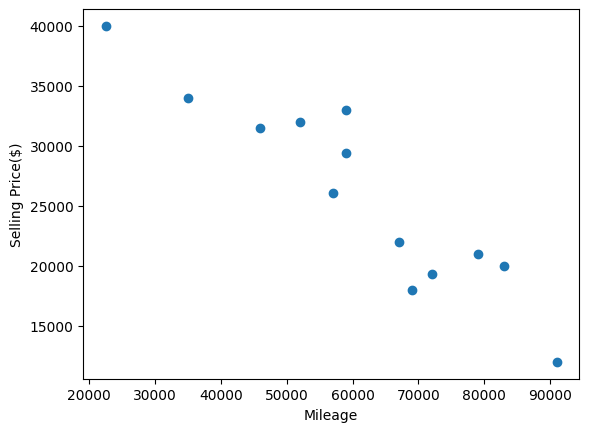

In [19]:
plt.scatter(car_data['Mileage'].values, car_data['SellPrice($)'].values)
plt.xlabel('Mileage')
plt.ylabel('Selling Price($)')

In [3]:
le = preprocessing.LabelEncoder()

car_data.CarModel = le.fit_transform(car_data.CarModel)
car_data

,CarModel,Mileage,SellPrice($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [4]:
x = car_data[['CarModel','Mileage','Age(yrs)']].values 
y = car_data['SellPrice($)'].values

x,y

(array([[    1, 69000,     6],
        [    1, 35000,     3],
        [    1, 57000,     5],
        [    1, 22500,     2],
        [    1, 46000,     4],
        [    0, 59000,     5],
        [    0, 52000,     5],
        [    0, 72000,     6],
        [    0, 91000,     8],
        [    2, 67000,     6],
        [    2, 83000,     7],
        [    2, 79000,     7],
        [    2, 59000,     5]], dtype=int64),
 array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
        22000, 20000, 21000, 33000], dtype=int64))

In [5]:
ct = ColumnTransformer([('CarModel',OneHotEncoder(),[0])], remainder = 'passthrough')

x = ct.fit_transform(x)
x

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [6]:
x = x[:,1:]
x

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [7]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [15]:
val1 = model.predict([[0,1,45000,4]])
val2 = model.predict([[1,0,86000,7]])
score = model.score(x,y)
print("Price of Mercedes Benz 4yr old with mileage 45000:",val1)
print("Price of BMW X5 7yr old with mielage 86000:",val2)
print("Score: ",score)

Price of Mercedes Benz 4yr old with mileage 45000: [36991.31721062]
Price of BMW X5 7yr old with mielage 86000: [11080.74313219]
Score:  0.9417050937281082
